# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

# Load the data

In [28]:
salary=pd.read_csv("Final.csv",encoding='latin-1')
salary

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3.6,Tech Mahindra,937156,"4,18,054","23,35,432",/yr
1,3.7,Optum,1508702,"8,87,265","24,00,000",/yr
2,4.1,Fresher,540557,"1,89,354","14,72,751",/yr
3,3.7,HCL Technologies,887986,"4,16,339","19,26,785",/yr
4,3.9,Genpact,972181,"2,49,195","23,82,853",/yr
...,...,...,...,...,...,...
4095,4.5,Google,"58,77,867","70,05,287","76,89,380",/mo
4096,3.6,Bookmyshow,"2,44,504","2,92,593","3,18,666",/mo
4097,3.9,Philips,"1,63,488","1,96,938","2,11,783",/mo
4098,3.5,CL Educate,"49,324","59,388","63,923",/mo


In [29]:
salary.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    3854 non-null   float64
 1   Company   4100 non-null   object 
 2   Average   4100 non-null   object 
 3   Lowest    4100 non-null   object 
 4   Highest   4100 non-null   object 
 5   yr/mo/hr  4100 non-null   object 
dtypes: float64(1), object(5)
memory usage: 192.3+ KB


# Data Cleaning

# Salary Colums as object data type, lets convert into int type 


In [30]:
salary['Lowest'] = salary['Lowest'].str.replace(',', '').astype(int)
salary['Highest']= salary['Highest'].str.replace(',', '').astype(int)
salary['Average']= salary['Average'].str.replace(',', '').astype(int)


In [31]:
salary['yr/mo/hr'].value_counts()

/yr    3907
/mo     188
/hr       5
Name: yr/mo/hr, dtype: int64

# Salaries as per /yr/mo/hr

# Standardize the salaries according to yearwise salary

In [35]:
#CONVERTING HOURLY SALARIES INTO MONTHWISE

#The minimum average work hours in India are 40 hours per week & there are on average 4 working weeks per month
#Average work hours for a month = 40 * 4 

salary['Average'].loc[salary['yr/mo/hr'] == '/hr'] = salary['Average'].loc[salary['yr/mo/hr'] == '/hr']* 40 * 4
salary['Lowest'].loc[salary['yr/mo/hr'] == '/hr'] = salary['Lowest'].loc[salary['yr/mo/hr'] == '/hr']* 40 * 4
salary['Highest'].loc[salary['yr/mo/hr'] == '/hr'] = salary['Highest'].loc[salary['yr/mo/hr'] == '/hr']* 40 * 4
salary['yr/mo/hr'].loc[salary['yr/mo/hr'] == '/hr'] = '/mo'

##CONVERTING MONTHLY SALARIES INTO YEARWISE
salary['Average'].loc[salary['yr/mo/hr'] == '/mo'] = salary['Average'].loc[salary['yr/mo/hr'] == '/mo'] * 12
salary['Lowest'].loc[salary['yr/mo/hr'] == '/mo'] = salary['Lowest'].loc[salary['yr/mo/hr'] == '/mo'] * 12
salary['Highest'].loc[salary['yr/mo/hr'] == '/mo'] = salary['Highest'].loc[salary['yr/mo/hr'] == '/mo'] * 12
salary['yr/mo/hr'].loc[salary['yr/mo/hr'] == '/mo'] = '/yr'

salary.drop('yr/mo/hr', axis=1, inplace=True)

<ipython-input-35-2d95abb2da2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['Average'].loc[salary['yr/mo/hr'] == '/hr'] = salary['Average'].loc[salary['yr/mo/hr'] == '/hr']* 40 * 4
<ipython-input-35-2d95abb2da2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['Lowest'].loc[salary['yr/mo/hr'] == '/hr'] = salary['Lowest'].loc[salary['yr/mo/hr'] == '/hr']* 40 * 4
<ipython-input-35-2d95abb2da2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

# Checking the missing values

In [36]:
salary.isna().sum()

Rating     246
Company      0
Average      0
Lowest       0
Highest      0
dtype: int64

In [38]:
salary.dropna()

,Rating,Company,Average,Lowest,Highest
0,3.6,Tech Mahindra,937156,418054,2335432
1,3.7,Optum,1508702,887265,2400000
2,4.1,Fresher,540557,189354,1472751
3,3.7,HCL Technologies,887986,416339,1926785
4,3.9,Genpact,972181,249195,2382853
...,...,...,...,...,...
4095,4.5,Google,70534404,84063444,92272560
4096,3.6,Bookmyshow,2934048,3511116,3823992
4097,3.9,Philips,1961856,2363256,2541396
4098,3.5,CL Educate,591888,712656,767076


# The 'Rating' column in the provided dataset is missing values, so let's populate it with the rating column mean.

In [39]:
salary['Rating'].fillna(value=salary['Rating'].mean(), inplace=True)

In [40]:
salary.isna().sum()

Rating     0
Company    0
Average    0
Lowest     0
Highest    0
dtype: int64

In [11]:
salary.head()


,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3.6,Tech Mahindra,937156,418054,2335432,/yr
1,3.7,Optum,1508702,887265,2400000,/yr
2,4.1,Fresher,540557,189354,1472751,/yr
3,3.7,HCL Technologies,887986,416339,1926785,/yr
4,3.9,Genpact,972181,249195,2382853,/yr


In [12]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    4100 non-null   float64
 1   Company   4100 non-null   object 
 2   Average   4100 non-null   int32  
 3   Lowest    4100 non-null   int32  
 4   Highest   4100 non-null   int32  
 5   yr/mo/hr  4100 non-null   object 
dtypes: float64(1), int32(3), object(2)
memory usage: 144.3+ KB


In [13]:
salary.describe()

,Rating,Average,Lowest,Highest
count,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03
mean,3.932486,7.608688e+05,7.675292e+05,1.140150e+06
std,0.522393,1.552357e+06,1.789429e+06,2.241165e+06
min,1.000000,1.400000e+01,1.000000e+00,1.900000e+01
25%,3.700000,8.158700e+04,8.509100e+04,1.092618e+05
50%,3.932486,5.573645e+05,5.380660e+05,7.592660e+05
75%,4.200000,1.025322e+06,1.015828e+06,1.565450e+06
max,5.000000,8.404587e+07,1.009569e+08,1.091578e+08


# Explotary Data Analysis

# let's explore the data with some vizualisation plots

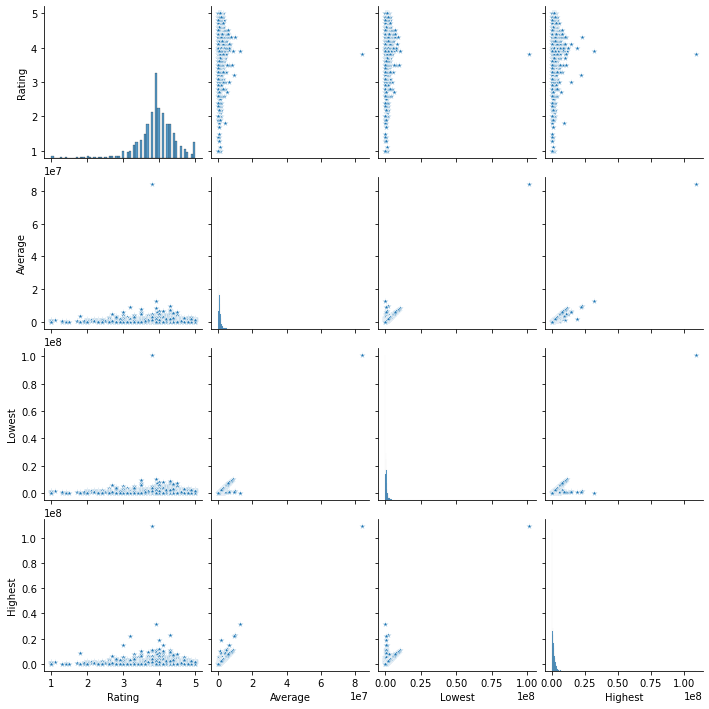

In [15]:
#Representing the correlation among the all the int type variables
sns.pairplot(salary, markers='*')
plt.show()

# Histogram Plot

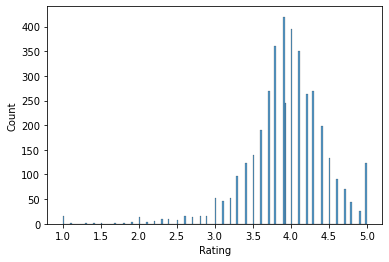

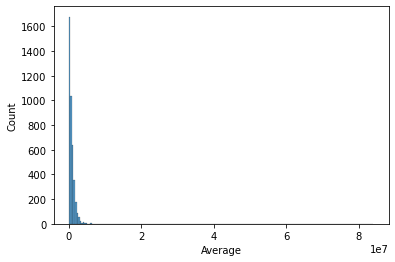

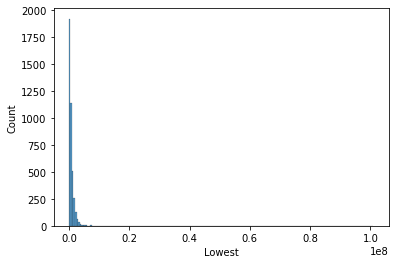

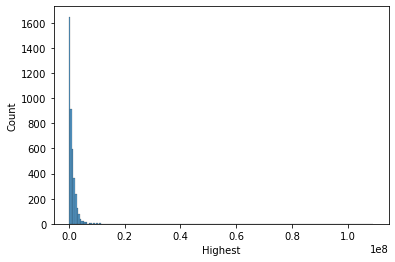

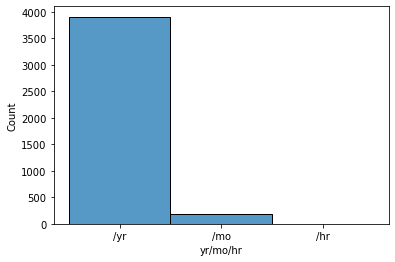

In [17]:
for x in salary.drop('Company', axis=1).columns:
    sns.histplot(salary[x], bins=200)
    plt.show()
    print('\n')

In [19]:
salary['Company'].nunique()

3230

# Top 10 companies with the highest average income for data scientist are shown in a bar plot.

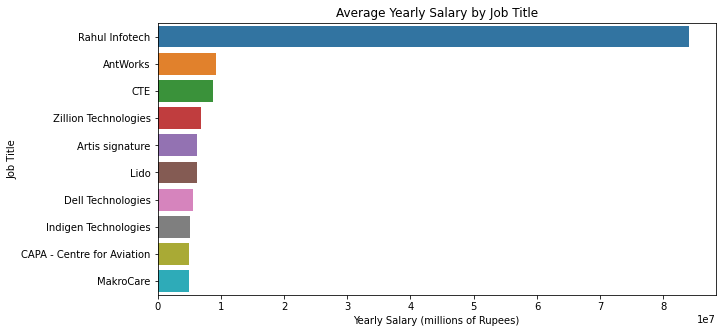

In [20]:
plt.figure(figsize=(10,5))
MeanSalary = salary.groupby('Company')[['Average']].agg('mean').reset_index().sort_values('Average', ascending=False)
sns.barplot(y='Company', x='Average', data=MeanSalary[:10])
plt.xlabel('Yearly Salary (millions of Rupees)')
plt.ylabel('Job Title')
plt.title('Average Yearly Salary by Job Title')
plt.show()


# Let's determine the maximum number of employment for each company.

In [21]:
Salary=salary['Company'].value_counts()
Salary =Salary.to_frame().reset_index()
Salary

,index,Company
0,Tata Consultancy Services,19
1,Accenture,15
2,IBM,14
3,Fresher,12
4,dunnhumby,11
...,...,...
3225,Ankit,1
3226,PlotMyData,1
3227,YOGESH SHARMA,1
3228,Raj Mahawala,1


In [22]:
Salary.rename(columns = {'index':'company','Company':'Job_count'}, inplace = True)
Salary.head(10)

,company,Job_count
0,Tata Consultancy Services,19
1,Accenture,15
2,IBM,14
3,Fresher,12
4,dunnhumby,11
5,Infosys,11
6,Amazon,10
7,ZS Associates,9
8,Cognizant Technology Solutions,8
9,Wipro,8


# Visualizung by using barplot

Text(0.5, 1.0, 'Number of Jobs in particular company')

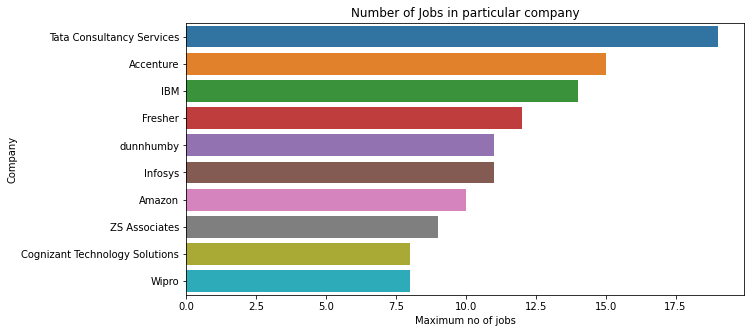

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=Salary['Job_count'][:10],y=Salary['company'][:10])
plt.xlabel('Maximum no of jobs')
plt.ylabel('Company')
plt.title('Number of Jobs in particular company')

# Visualizing the highets salaries given by companies

<ipython-input-24-332c672532ff>:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=Salary['Highest'][:10],y=Salary['Company'][:10])


Text(0.5, 1.0, 'Highest Salaries given by companies')

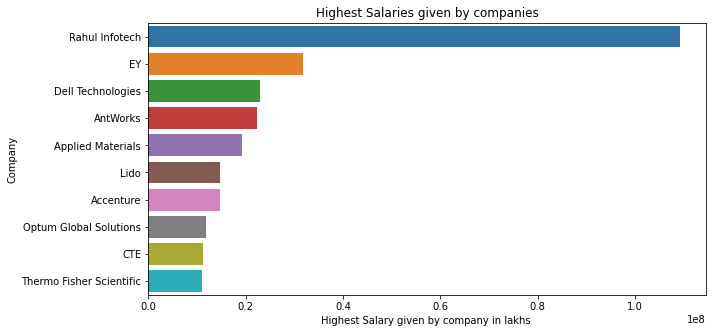

In [24]:
Salary=salary.sort_values(by='Highest',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=Salary['Highest'][:10],y=Salary['Company'][:10])
plt.xlabel('Highest Salary given by company in lakhs ')
plt.ylabel('Company')
plt.title('Highest Salaries given by companies')

# Insights from Analysis
There are 4100 companies in the data overall, but only 3230 of them are unique.
Rahul Infotech, a business, pays the highest wage, which is around Rs. 10,91,57,751 followed by google.
Rahul Infotech pays the highest average compensation, which is over 8 crore INR.
Tata Consultancy Services appeared in our search results the most-18 times, on average.